# Answers

You can edit this Jupyter notebook to include your answers and run any code that generates those answers or produces plots.  You can add additional cells for code or markdown as needed.

This homework is primarily about running simulations involving initial value problems (IVPs)

## Problem 0 (45 points)

In this problem, you'll implement a custom ODE solver for `solve_ivp` based on the Forward Euler method, and implement some basic tests.

### Part A (20 points)
If you read the [documentation for `solve_ipv`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.solve_ivp.html), which we used in class, you'll see that you can write your own solver.

Write a solver for the forward Euler method, which is not implemented as one of the available solvers (while simple, it typically is not very accurate).  Recall, this is the basic rule:
\begin{equation}
y(t + h) = y(t) + h f(t, y)
\end{equation}

Your solver should be a class which is derived from [`scipy.integrate.OdeSolver`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.OdeSolver.html#scipy.integrate.OdeSolver)
```python
class ForwardEuler(scipy.integrate.OdeSolver):
    pass
```

Your class definition should go in [`euler.py`](euler.py)

You should read the documentation for this base class in order to implement `ForwardEuler`.  Here are some hints/notes:
* Allow a user to set `h` using a keyword argument.  This can be passed using `solve_ivp(..., method=ForwardEuler, h=0.01)` to set `h=0.01`
* Use a default step size `h = (t_bound - t0) / 100`
* private methods begin with an underscore "_"
* the method `_dense_output_impl(self)` should output a `ForwardEulerOutput` (defined in [`euler.py`](euler.py))
* direction should be `+1`
* You won't use a Jacobian, so `njev` and `nlu` can remain at 0.
* You may want to consider using `super(ForwardEuler, self).__init__`
* You may want to read the source code for the parent class [here](https://github.com/scipy/scipy/blob/v1.5.3/scipy/integrate/_ivp/base.py#L25-L214)

---

*put any discussion here*

In [1]:
from scipy.integrate import solve_ivp
from euler import ForwardEuler

### Part B (10 points)

Use your `ForwardEuler` solver and `solve_ivp` to solve an IVP $y'(t) = y$ with $y(0) = 1$ on the domain $t\in [0,5]$, using a step size `h=0.01`.  Make a plot of the solution to this IVP with axes labeled `y` and `x`.

Use SymPy to obtain the ground-truth solution to this IVP.  What is the largest error you see on the domain you solved the problem?  Try solving with the default solver in `solve_ivp`.  What is the largest error in this case?

---

*put your answers here*

In [4]:
def fun(t, y): return y
sol0 = solve_ivp(fun = fun, t_span = (0, 5), h = 0.01, y0 = [1], method = ForwardEuler)

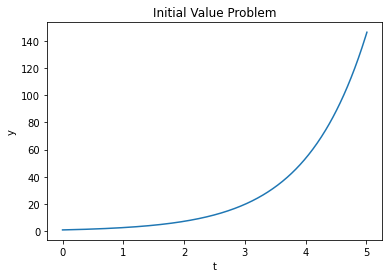

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Plot the solution
plt.plot(sol0.t, sol0.y[0])
plt.title("Initial Value Problem")
plt.ylabel("y")
plt.xlabel("t")
plt.show()

The plot looks about right, since the analytical solution of the IVP is $y(t) = e^{t}$. I confirm this with SymPy as requested.

In [6]:
import sympy as sym
from sympy.solvers import ode

t = sym.symbols('t') # symbol
y = sym.Function('y') # symbolic function

eqn = y(t).diff(t) - y(t)
f = ode.dsolve(eqn, hint='separable', ics={y(0): 1})
f

Eq(y(t), exp(t))

In [5]:
# Defining the ground-truth function
f_true = lambda t : np.exp(t)
true_val = f_true(sol0.t)

# Maximum error
abs(true_val - sol0.y).max()

3.6842359921385537

I confirm that the error is quite large for the Euler method.

In [6]:
# Using default method
sol0_default = solve_ivp(fun = fun, t_span = (0, 5), y0 = [1])

In [7]:
# Maximum error for default method
true_val2 = f_true(sol0_default.t)
abs(true_val2 - sol0_default.y).max()

0.018750365586669204

The default method is much more accurate than Euler, but I am still surprised that it is quite far off.

### Part C (15 points)

Implement unit tests that verify that ODE solutions (numerically) obey the ODE.  Try this for $y'(t) = y$, with $y(0) = 1$ on the domain $t\in [0,5]$.  use a finite difference stencil with step size `k` (`k` should be smaller than the `h` you used to solve the ODE) to compute the derivative at several points.  You should only expect the derivative to be accurate to about `h*y`

Implement tests for `solve_ivp` using the default settings as well as using your `ForwardEuler` implementation.

Put these tests in [`test.py`](test.py).  Set up your unit tests to run when you push changes to GitHub using GitHub actions. In order to respect server time, set a 10 minute time-limit on your github actions workflow. To see an example of how to set a time-limit, see line 9 in the relevant file from Homework 3 by clicking [here](https://github.com/caam37830-2021/homework-3-template/blob/main/.github/workflows/push.yml).

---

*put any discussion here*

*(This problem was removed.)*

## Problem 1 (20 points)

In this problem, you'll solve two simple, but related, ODEs using `solve_ivp`.

### Part A (13 points)

On the surface of the earth, objects are accelerated by a more-or-less constant gravitational field.  We'll consider an object thrown vertically with initial position $y=y_0$, and initial velocity $y' = v_0$.

We'll consider a simplified problem with no wind resistance.  Newton's laws of motion tell us $y''(t) = -g$, where $g = 9.8 m/s^2$.  This is a second order ODE, which we can turn into a system of first order ODEs using the substituion $p = y'$.  Then we have
\begin{equation}
\begin{cases}
y'(t) = p(t)\\
p'(t) = -g
\end{cases}
\end{equation}

You can encode this using a vector $v$, where $v[0]$ is the value $y$ above, and $v[1]$ is $p$.

Use `solve_ivp` to solve for `y(t)` using `y0 = 0` and `y'(0) = 10` (i.e. you throw a ball straight up in the air at a speed of $10 m/s$).  Run this simulation for $4$ seconds.  make a plot of the trajectory $y$ as a function of $t$ (i.e. $t$ is on the horizontal axis and $y$ is on the vertical axis).  Set up an event to end the simulation when `y` is zero again (when the ball hits the ground).  At what time does the ball hit the ground?

Set up an event to find when the ball is at its highest point (`p(t) = 0`).  This should not terminate the simulation.

---

*put any answers/discussion here*

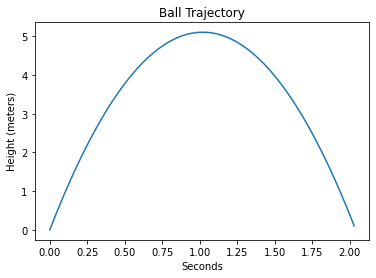

In [7]:
# Define values necessary for IVP
y0, p0, g = 0, 10, 9.8 
v0 = np.array([y0, p0]) # throw the two initial values into array
f = lambda t, y : np.array([y[1], -g]) # rhs function
t_span = (0, 4) # up until 4 seconds
t_eval = np.linspace(0, 4, 200)
highest = lambda t, y : y[1] # create event for highest point
hit_ground = lambda t, y : y[0] # create event for when hits ground
hit_ground.terminal = True # create the event as terminal
hit_ground.direction = -1

# Solve IVP
sol = solve_ivp(fun = f, t_span = t_span, t_eval = t_eval, y0 = v0, events = (highest, hit_ground))

# Create the plot
plt.plot(sol.t, sol.y[0])
plt.title("Ball Trajectory")
plt.ylabel("Height (meters)")
plt.xlabel("Seconds")
plt.show()

In [8]:
sol.t_events[1] # time that the ball hits the ground (event 1)

array([2.04081633])

In [9]:
sol

  message: 'A termination event occurred.'
     nfev: 38
     njev: 0
      nlu: 0
      sol: None
   status: 1
  success: True
        t: array([0.        , 0.0201005 , 0.04020101, 0.06030151, 0.08040201,
       0.10050251, 0.12060302, 0.14070352, 0.16080402, 0.18090452,
       0.20100503, 0.22110553, 0.24120603, 0.26130653, 0.28140704,
       0.30150754, 0.32160804, 0.34170854, 0.36180905, 0.38190955,
       0.40201005, 0.42211055, 0.44221106, 0.46231156, 0.48241206,
       0.50251256, 0.52261307, 0.54271357, 0.56281407, 0.58291457,
       0.60301508, 0.62311558, 0.64321608, 0.66331658, 0.68341709,
       0.70351759, 0.72361809, 0.74371859, 0.7638191 , 0.7839196 ,
       0.8040201 , 0.8241206 , 0.84422111, 0.86432161, 0.88442211,
       0.90452261, 0.92462312, 0.94472362, 0.96482412, 0.98492462,
       1.00502513, 1.02512563, 1.04522613, 1.06532663, 1.08542714,
       1.10552764, 1.12562814, 1.14572864, 1.16582915, 1.18592965,
       1.20603015, 1.22613065, 1.24623116, 1.26633166, 1.

The ball hits the ground at approximately 2.040816333 seconds after the throw.

### Part B (7 points)

We'll now take into account wind resistance on the ball.  We'll make a bunch of assumptions, and simply assume that the drag can be expressed as a force that accelerates the ball by adding a term `y''(t) = p'(t) = -9.8 -0.02 sgn(p(t)) p(t)**2`, where `sgn(p(t))` can be computed using `np.sign` (the sign of the velocity).

Incorporate this term into the system of ODEs, and use `solve_ivp` to plot the trajectory of the ball with the same initial conditions as in part A.  Set up an event to terminate the simulation when the ball hits the ground.  At what time does the ball hit the ground?  Is this before or after the ball hits the ground when there is no wind resistance?

Set up an event to find when the ball is at its highest point (`p(t) = 0`).  This should not terminate the simulation.

---

*put any answers/discussion here*

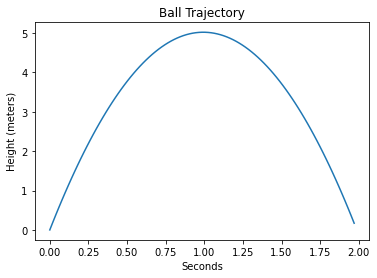

In [10]:
# Define the new rhs function
f_2 = lambda t, y: np.array([y[1], -g - 0.02 * np.sign(y[0]) * (y[0])**2])

# Solve IVP
sol2 = solve_ivp(fun = f_2, t_span = t_span, t_eval = t_eval, y0 = v0, events = (highest, hit_ground))

# Create the plot
plt.plot(sol2.t, sol2.y[0])
plt.title("Ball Trajectory")
plt.ylabel("Height (meters)")
plt.xlabel("Seconds")
plt.show()

In [11]:
sol2.t_events[1]

array([1.98691643])

In [12]:
sol2

  message: 'A termination event occurred.'
     nfev: 38
     njev: 0
      nlu: 0
      sol: None
   status: 1
  success: True
        t: array([0.        , 0.0201005 , 0.04020101, 0.06030151, 0.08040201,
       0.10050251, 0.12060302, 0.14070352, 0.16080402, 0.18090452,
       0.20100503, 0.22110553, 0.24120603, 0.26130653, 0.28140704,
       0.30150754, 0.32160804, 0.34170854, 0.36180905, 0.38190955,
       0.40201005, 0.42211055, 0.44221106, 0.46231156, 0.48241206,
       0.50251256, 0.52261307, 0.54271357, 0.56281407, 0.58291457,
       0.60301508, 0.62311558, 0.64321608, 0.66331658, 0.68341709,
       0.70351759, 0.72361809, 0.74371859, 0.7638191 , 0.7839196 ,
       0.8040201 , 0.8241206 , 0.84422111, 0.86432161, 0.88442211,
       0.90452261, 0.92462312, 0.94472362, 0.96482412, 0.98492462,
       1.00502513, 1.02512563, 1.04522613, 1.06532663, 1.08542714,
       1.10552764, 1.12562814, 1.14572864, 1.16582915, 1.18592965,
       1.20603015, 1.22613065, 1.24623116, 1.26633166, 1.

The ball hits ground at 1.98691643 seconds after the throw. This is slightly before the ball hits ground without wind resistance.

## Problem 2 (25 points)

Now that you're warmed up, here are some more simulations.

### Part A (15 points)

In this problem, we'll simulate a planet and moon moving in a 2-dimensional plane.

Newton's law of gravity says that $F_g = Gm_1 m_2 / \|r\|^2$.  The direction of the force is in the direction of the vector $r$.  Let $x(t)$ dentote the position of the planet and $y(t)$ denote the position of the moon, and $r(t) = x(t) - y(t)$ Then
\begin{equation}
x''(t) = -F_g / m_1 \times r / \|r\|\\
y''(t) = F_g / m_2 \times r / \|r\|
\end{equation}
$x$ and $y$ are 2-vectors, so this is a system of 4-second order ODEs.  We can use the trick from problem 1 to write this as 8 first order ODEs by introducing the vector-valued variables
$p(t) = x'(t)$, and $q(t) = y'(t)$.  Here are the terms for $x$:
\begin{equation}
p_1'(t) = -F_g / m_1 \times r_1(t) / \|r\|\\
p_2'(t) = -F_g / m_1 \times r_2(t) / \|r\|\\
x_1'(t) = p_1(t)\\
x_2'(t) = p_2(t)
\end{equation}

We'll model the Earth and moon.  The [Gravitational constant](https://en.wikipedia.org/wiki/Gravitational_constant) has value `G=6.67 e-11` (we're dropping units, which are all SI).  The mass of the earth is `m1 = 5.972 e24`, and the mass of the moon is `m2=0.07346 e24`.  The distance from the moon to the earth is `r = 384.4 e6`.  This means the orbital speed of the moon around the earth is about `1.022 e3`.

Use `solve_ivp` to run a simulation of the moon orbiting the earth for `5 e6` seconds (about 2 months).  Use initial conditions $x(0) = 0, p(0) = 0$ for the earth, and $y(0) = (0, 384.4 \times 10^6)$ and $q(0) = (1.022 \times 10^3, 0)$

Plot $x_1(t), x_2(t)$ and $y_1(t), y_2(t)$ in the same plane with different colors (include a legend and title).

---

We can further simplify the equations modeling this behavior.
$$
\begin{equation}
x(t) = (x_{1}(t), x_{2}(t))\\
y(t) = (y_{1}(t), y_{2}(t))\\
r(t) = (r_{1}(t), r_{2}(t)) = (x_{1}(t) - y_{1}(t), x_{2}(t) - y_{2}(t)), \text{where} \|r\| = 384.4e6 \\
x'(t) = (x_{1}'(t), x_{2}'(t)) = (p_{1}(t), p_{2}(t))\\
y'(t) = (y_{1}'(t), y_{2}'(t)) = (q_{1}(t), q_{2}(t))\\
x''(t) = (-\frac{Gm_{2}}{\|r\|^2}\times \frac{r_{1}(t)}{\|r\|}, -\frac{Gm_{2}}{\|r\|^2}\times \frac{r_{2}(t)}{\|r\|})\\ 
\hspace{70pt} = (-\frac{Gm_{2}}{\|r\|^2}\times \frac{x_{1}(t) - y_{1}(t)}{\|r\|}, -\frac{Gm_{2}}{\|r\|^2}\times \frac{x_{2}(t) - y_{2}(t)}{\|r\|})\\
y''(t) = (\frac{Gm_{1}}{\|r\|^2}\times \frac{r_{1}(t)}{\|r\|}, -\frac{Gm_{1}}{\|r\|^2}\times \frac{r_{2}(t)}{\|r\|})\\
\hspace{70pt} = (-\frac{Gm_{1}}{\|r\|^2}\times \frac{x_{1}(t) - y_{1}(t)}{\|r\|}, -\frac{Gm_{1}}{\|r\|^2}\times \frac{x_{2}(t) - y_{2}(t)}{\|r\|})\\
\end{equation}
$$

I form my function based on the above formulae for $x'(t)$, $y'(t)$, $x''(t)$, and $y''(t)$.

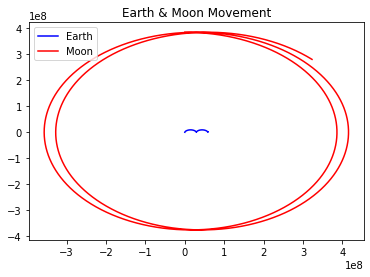

In [12]:
# Some initial values / arguments
G = 6.67e-11
m1 = 5.972e24
m2 = 0.07346e24
r_norm = 384.4e6
x0 = np.array([0, 0])
y0 = np.array([0, 384.4e6])
p0 = np.array([0, 0])
q0 = np.array([1.022e3, 0])
v0 = np.concatenate((x0, p0, y0, q0), axis = None)
time = (0, 5e6)
t_eval = np.linspace(0, 5e6, 10000) # just to make things look nicer

def f_3(t, v) :
    """
    returns an array of rhs values for the given ODE IVP
    """
    dx1 = v[2] # derivative of x_{1}(t) = p_{1}(t)
    dx2 = v[3] # derivative of x_{2}(t) = p_{2}(t)
    d2x1 = (-G * m2 / (r_norm**2)) * ((v[0] - v[4]) / r_norm) # second derivative of x_{1}(t)
    d2x2 = (-G * m2 / (r_norm**2)) * ((v[1] - v[5]) / r_norm) # second derivative of x_{2}(t)
    dy1 = v[6] # derivative of y_{1}(t) = q_{1}(t)
    dy2 = v[7] # derivative of y_{2}(t) = q_{2}(t)
    d2y1 = (G * m1 / (r_norm**2)) * ((v[0] - v[4]) / r_norm) # second derivative of y_{1}(t)
    d2y2 = (G * m1 / (r_norm**2)) * ((v[1] - v[5]) / r_norm) # second derivative of y_{2}(t)
    
    # put values into an array
    new = np.array([dx1, dx2, d2x1, d2x2, dy1, dy2, d2y1, d2y2])
    return new

# Solve IVP
sol3 = solve_ivp(fun = f_3, t_span = time, t_eval = t_eval, y0 = v0)

# Create plot
plt.plot(sol3.y[0], sol3.y[1], label = "Earth", color = "b") # movement of Earth (x(t)) in color blue
plt.plot(sol3.y[4], sol3.y[5], label = "Moon", color = "r") # movement of the moon (y(t)) in color red
plt.title("Earth & Moon Movement")
plt.legend()
plt.show()

We can visually observe that the moon orbits the Earth approximately twice during the given time frame. It is also interesting to note that each orbit is not exactly equal and that the Earth's position also shifts a little.

### Part B (10 points)

The [Lorentz system](https://en.wikipedia.org/wiki/Lorenz_system) is a simplified model of atmospheric convection, which is one of the earliest systems investigated which exhibit [chaotic behavior](https://en.wikipedia.org/wiki/Chaos_theory).

\begin{equation}
\begin{cases}
dx/dt = \sigma( y - x)\\
dy/dt = x( \rho - z) - y\\
dz/dt = xy - \beta z
\end{cases}
\end{equation}

$x$ is the rate of convection, and $y$ and $z$ measure horizontal and vertical temperature variation.

You can use the parameters Lorentz used: $\sigma=10, \beta = 8/3, \rho = 28$.  
Run one simulation starting $x = y = z = 10$.  Run the simulation for $t\in [0,7]$.

Run another simulation starting at $y = z = 10$, and $x = 10.1$.  Run the simulation for $t \in [0,7]$.

Plot both solution trajectories in the $x,y$ plane (i.e. `plt(sol.y[0], sol.y[1],...`) using different colors (include labels, a title, and legend).  This system is chaotic, so the trajectories should start close and then get further apart.

---

What we are given can be rewritten as follows:
\begin{equation}
\begin{cases}
x'(t) = \sigma (y - x)\\
y'(t) = x(\rho - z) - y \\
z'(t) = xy - \beta z
\end{cases}
\end{equation}

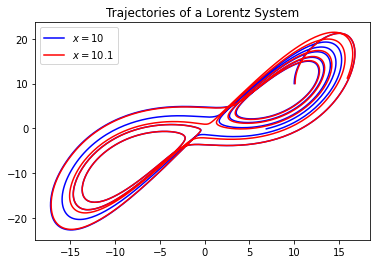

In [13]:
# Set initial values / arguments
sigma = 10
beta = 8 / 3
rho = 28
time2 = (0, 7)
t_eval = np.linspace(0, 7, 2000) # to increase resolution

# Case when x = y = z = 10
x0 = 10
y0 = 10
z0 = 10
v0 = np.array([x0, y0, z0])

# Define rhs function
f_4 = lambda t, v : np.array([sigma * (v[1] - v[0]), v[0] * (rho - v[2]) - v[1], v[0] * v[1] - beta * v[2]])

# Solve first IVP
sol4 = solve_ivp(fun = f_4, t_span = time2, t_eval = t_eval, y0 = v0)

# Set different initial values
x0_2 = 10.1
v0_2 = np.array([x0_2, y0, z0])

# Solve second IVP
sol5 = solve_ivp(fun = f_4, t_span = time2, t_eval = t_eval, y0 = v0_2)

# Create plot
plt.plot(sol4.y[0], sol4.y[1], label = "$x = 10$", color = "b") # trajectory of first case
plt.plot(sol5.y[0], sol5.y[1], label = "$x = 10.1$", color = "r") # trajectory of second case
plt.title("Trajectories of a Lorentz System")
plt.xlabel = "Rate of Convection"
plt.ylabel = "Horizontal Temperature Variation"
plt.legend()
plt.show()

Even though the $x$ values are off by a tiny margin, the two systems do not overlap much. They begin at a similar point, but the $xy$-plot forms a chaotic shape resembling the symbol for infinity.

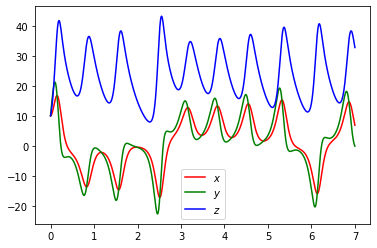

In [14]:
# Another way to look at it, just for fun
plt.plot(sol4.t, sol4.y[0], label = "$x$", color = "r")
plt.plot(sol4.t, sol4.y[1], label = "$y$", color = "g")
plt.plot(sol4.t, sol4.y[2], label = "$z$", color = "b")
plt.legend()
plt.show()

## Problem 3 (10 points)

Use functionality from `scipy.sparse` to help illustrate your answers to the following questions.

I. In the [class materials on differentiation](https://caam37830.github.io/book/04_functions/differentiation.html), we defined `forward_diff_matrix` and `backward_diff_matrix`.  What vectors characterize the nullspace of each of these matrices (i.e. vectors `x` so that `D @ x = 0`)?

II. Give an interpretation (from calculus) of the vector `y` where `y` solves the linear system `D @ y = x`, where `D` is a finite-difference matrix.  What is the implication of the nullspace of `D` on solving this linear system?

III. Create a finite difference operator for the Laplacian $\Delta = \partial_x^2 + \partial_y^2$ where second-order differences are based on the stencil `[1, -2, 1]`.  What is the nullspace of this matrix?

---
### Part I.

Note that `forward_diff_matrix` and `backward_diff_matrix` are row equivalent. Then, their null spaces are also equivalent, since row spaces are the same. ($\because$ row space and null space are orthogonal complements) Thus, it suffices to characterize one of the two. To illustrate, I explicitly solve for the null space of a $4\times 4$ `forward_diff_matrix`.

$$
D =
\begin{bmatrix}
-1& 1& 0& 0\\
0& -1& 1& 0\\
0& 0& -1& 1\\
0& 0& 0& 0&\\
\end{bmatrix}
\sim
\begin{bmatrix}
1& 0& 0& -1\\
0& 1& 0& -1\\
0& 0& 1& -1\\
0& 0& 0& 0&\\
\end{bmatrix}
$$
which is RREF.

The null space is characterized by the vector of the form $c*[1, 1, 1, 1]^{T}$ where $c \in \mathbb{R}$. This vector corresponds to a constant function $f(x) = c, \; \forall x$, where $c \in \mathbb{R}$. This makes sense, since the derivative of a constant function is always zero.

In general, a $n\times n$ differentiation matrix will have a rank of $n - 1$, due to our choice of leaving the last diagonal as zero. This makes intuitive sense that the null space consists of a single-vector (or one-dimensional) basis.

I first demonstrate this by computing the actual matrix-vector multiplication with a randomly generated vector of the form $c*\mathbb{1}$.

In [46]:
import scipy.sparse as sparse
import scipy.sparse.linalg as sla

# Almost the same setting as the lecture note
xs = np.linspace(-5, 5, 100)
h = 10/99
c = np.random.random(1) # randomly generate c
v = np.ones(100)
x = c * v # create x \in null(D)

# Define forward_diff_matrix (slightly modified from lecture note)
def forward_diff_matrix(n):
    """
    returns n * n forward differentiation matrix
    """
    data = []
    i = []
    j = []
    for k in range(n - 1):
        i.append(k)
        j.append(k)
        data.append(-1 / h)

        i.append(k)
        j.append(k+1)
        data.append(1 / h)
        
    # set the last entry to 0 to have a square matrix
    return sparse.coo_matrix((data, (i,j)), shape=(n, n)).tocsr()

# Define backward_diff_matrix (also slightly modified from lecture note)
def backward_diff_matrix(n):
    """
    returns n * n backward differentiation matrix
    """
    data = []
    i = []
    j = []
    for k in range(1, n):
        i.append(k)
        j.append(k)
        data.append(1 / h)

        i.append(k)
        j.append(k-1)
        data.append(-1 / h)
        
    # set the last entry to 0 to have a square matrix
    return sparse.coo_matrix((data, (i,j)), shape=(n, n)).tocsr()

# Create both differentiation matricess
D_forward = forward_diff_matrix(len(xs))
D_backward = backward_diff_matrix(len(xs))

# Multiply x
a = D_forward.dot(x)
b = D_backward.dot(x)

print(np.linalg.norm(a))
print(np.linalg.norm(b))

0.0
0.0


The norms of the product equal to zero, which implies $a = 0$ and $b = 0$.

Next, to ascertain the null space, I run a singular value decomposition of `D_forward` when $n = 100$ to find the orthonormal basis.

In [47]:
np.linalg.matrix_rank(D_forward.todense()) # to confirm that rank(D) = n - 1

99

In [48]:
U, S, V = np.linalg.svd(D_forward.todense())
V.T[:, -1].flatten()

matrix([[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1,
         0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1,
         0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1,
         0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1,
         0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1,
         0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1,
         0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1,
         0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]])

This confirms that $c\mathbb{1}$ is the null space of differentiation matrices.

In [50]:
# I don't understand why the same can't be achieved with scipy.sparse.linalg
U1, S1, V1 = sla.svds(D_forward, which = 'SM')
V1.T[:, 0].flatten()

array([-0.0425763 ,  0.03975028, -0.08282562, -0.05657028, -0.0614511 ,
        0.15808974,  0.19133885, -0.00908822, -0.09502885, -0.04219097,
       -0.17991032,  0.10018395, -0.17856729,  0.04760572,  0.0441829 ,
        0.08284801, -0.15815693, -0.00908116, -0.01706196,  0.14879836,
       -0.08727273,  0.14229481,  0.01691455, -0.03527941, -0.06278762,
       -0.03682245, -0.08037288, -0.1687165 ,  0.01186104,  0.14135361,
       -0.05269628, -0.039929  , -0.01170402,  0.033486  ,  0.05922365,
        0.0274634 ,  0.10728164,  0.06728145, -0.091342  , -0.07758493,
        0.13272516, -0.05685018, -0.03266804, -0.15051488, -0.12404781,
       -0.01151697, -0.06949382, -0.13791652,  0.10128162, -0.16046275,
        0.13214315,  0.05696524,  0.01268229, -0.07459844,  0.15516452,
        0.16152087,  0.0123141 ,  0.00332432,  0.10936068, -0.16147626,
        0.04995717, -0.15008536, -0.14536861,  0.17026633, -0.05006123,
        0.01687404, -0.13919891, -0.01430959, -0.03656382,  0.02

### Part II.
Note that $Dy = x \Rightarrow Dy = c\mathbb{1}$, where $\mathbb{1}$ is a vector of ones.

Using basic knowledge from calculus, this means that the derivative of $y$ is a constant function. Hence, $y$ must be a vector that represents a first-order polynomial, i.e. $y(x) = cx + a$ for some constants $c$ and $a$.

To illustrate,

In [40]:
c = np.random.random(1) # randomly generate c
a = np.random.random(1) # randomly generate a
y_x = lambda x : c * x + a
yxs = y_x(xs)

D_forward.dot(yxs)

array([0.07411705, 0.07411705, 0.07411705, 0.07411705, 0.07411705,
       0.07411705, 0.07411705, 0.07411705, 0.07411705, 0.07411705,
       0.07411705, 0.07411705, 0.07411705, 0.07411705, 0.07411705,
       0.07411705, 0.07411705, 0.07411705, 0.07411705, 0.07411705,
       0.07411705, 0.07411705, 0.07411705, 0.07411705, 0.07411705,
       0.07411705, 0.07411705, 0.07411705, 0.07411705, 0.07411705,
       0.07411705, 0.07411705, 0.07411705, 0.07411705, 0.07411705,
       0.07411705, 0.07411705, 0.07411705, 0.07411705, 0.07411705,
       0.07411705, 0.07411705, 0.07411705, 0.07411705, 0.07411705,
       0.07411705, 0.07411705, 0.07411705, 0.07411705, 0.07411705,
       0.07411705, 0.07411705, 0.07411705, 0.07411705, 0.07411705,
       0.07411705, 0.07411705, 0.07411705, 0.07411705, 0.07411705,
       0.07411705, 0.07411705, 0.07411705, 0.07411705, 0.07411705,
       0.07411705, 0.07411705, 0.07411705, 0.07411705, 0.07411705,
       0.07411705, 0.07411705, 0.07411705, 0.07411705, 0.07411

In [41]:
D_backward.dot(yxs)

array([0.        , 0.07411705, 0.07411705, 0.07411705, 0.07411705,
       0.07411705, 0.07411705, 0.07411705, 0.07411705, 0.07411705,
       0.07411705, 0.07411705, 0.07411705, 0.07411705, 0.07411705,
       0.07411705, 0.07411705, 0.07411705, 0.07411705, 0.07411705,
       0.07411705, 0.07411705, 0.07411705, 0.07411705, 0.07411705,
       0.07411705, 0.07411705, 0.07411705, 0.07411705, 0.07411705,
       0.07411705, 0.07411705, 0.07411705, 0.07411705, 0.07411705,
       0.07411705, 0.07411705, 0.07411705, 0.07411705, 0.07411705,
       0.07411705, 0.07411705, 0.07411705, 0.07411705, 0.07411705,
       0.07411705, 0.07411705, 0.07411705, 0.07411705, 0.07411705,
       0.07411705, 0.07411705, 0.07411705, 0.07411705, 0.07411705,
       0.07411705, 0.07411705, 0.07411705, 0.07411705, 0.07411705,
       0.07411705, 0.07411705, 0.07411705, 0.07411705, 0.07411705,
       0.07411705, 0.07411705, 0.07411705, 0.07411705, 0.07411705,
       0.07411705, 0.07411705, 0.07411705, 0.07411705, 0.07411

Note that, in practice, one of the entries become zero due to setting one of the diagonals as zero.

### Part III.

I construct the Laplacian matrix for the case when $n = 20$ to illustrate.

In [51]:
# Create a diff_matrix
D2 = forward_diff_matrix(20) @ backward_diff_matrix(20)

# Define second-order partial differentiation matrices
Dx2 = sparse.kron(sparse.eye(20), D2).tocsr()
Dy2 = sparse.kron(D2, sparse.eye(20)).tocsr()

# Define Laplacian matrix L
L = Dx2 + Dy2

Note that the rank of L is also $n-1$, which is odd since I expect more than the constant function to be mapped to zero by the transformation L.

In [53]:
np.linalg.matrix_rank(L.todense())

399

Again, I run a singular value decomposition to find the null space of L.

In [54]:
U_L, S_L, V_L = np.linalg.svd(L.todense())
V_L.T[:, -1].flatten()

matrix([[0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05,
         0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05,
         0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05,
         0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05,
         0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05,
         0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05,
         0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05,
         0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05,
         0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05,
         0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05,
         0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05,
         0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05,
         0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05,
         0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05,
         0.05, 0.05, 0.05, 0.05, 0

However, I can easily think of another example of a vector (or a function) that lies in the null space of L. The function needs to be of the form $f(x, y) = ax + by$ where $a, b$ are some constants.
$$\because \frac{\partial f}{\partial x} = a \Rightarrow \frac{\partial ^2 f}{\partial x^2} = 0 \; and \; \frac{\partial f}{\partial y} = b \Rightarrow \frac{\partial ^2 f}{\partial y^2} = 0$$\
$$ \Rightarrow \Delta = \frac{\partial ^2 f}{\partial x^2} + \frac{\partial ^2 f}{\partial y^2} = 0$$

## Feedback

If you would like share how long it took you to complete this assignment, it will help adjust the difficulty for future assignments.  You're welcome to share additional feedback as well.

This assignment took me a very long time, approximately 10 hours, to complete. Understanding the `OdeSolver` parent class was the main culprit.